In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

lsdata = pd.read_csv(r"C:\Users\heaven.ether\Desktop\BCA_DS\SEM 3_GDW\projects\People_Project_S3\Leroy\Leroy_Corizo\Leroy_Stock_Price_Prediction.csv")


In [6]:
lsdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
lsdata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [8]:
lsdata.shape

(1009, 7)

In [9]:
lsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [10]:
lsdata.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
lsdata.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
lsdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [13]:
lsdata.describe(include = object)

,Date
count,1009
unique,1009
top,2018-02-05
freq,1


In [15]:
numeric_columns = lsdata.select_dtypes(include=[np.number]).columns
# This line selects columns with numeric data types (e.g., int, float) from your DataFrame stock_data.

skewness = lsdata[numeric_columns].skew()
# This line calculates the skewness for all numeric columns in your DataFrame stock_data.
# It utilizes the previously selected numeric_columns to specify the columns for which skewness will be calculated.
# The result is a Series containing the skewness values for each numeric column.

skewness

Open         0.463163
High         0.461597
Low          0.459446
Close        0.457879
Adj Close    0.457879
Volume       2.995972
dtype: float64

## 1. Trend Analysis
# We can visually and quantitatively determine trends in stock prices.

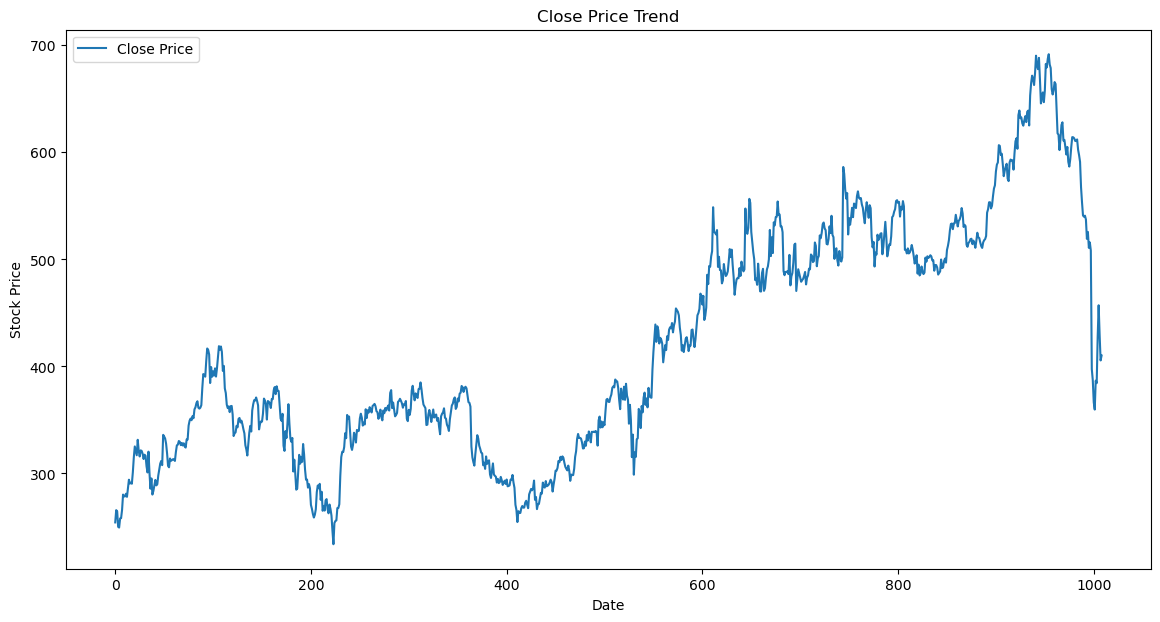

In [16]:
# Visual Trend Analysis
# Use line plots to visualize the overall trend.

plt.figure(figsize=(14, 7))
plt.plot(lsdata.index, lsdata['Close'], label='Close Price')
plt.title('Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


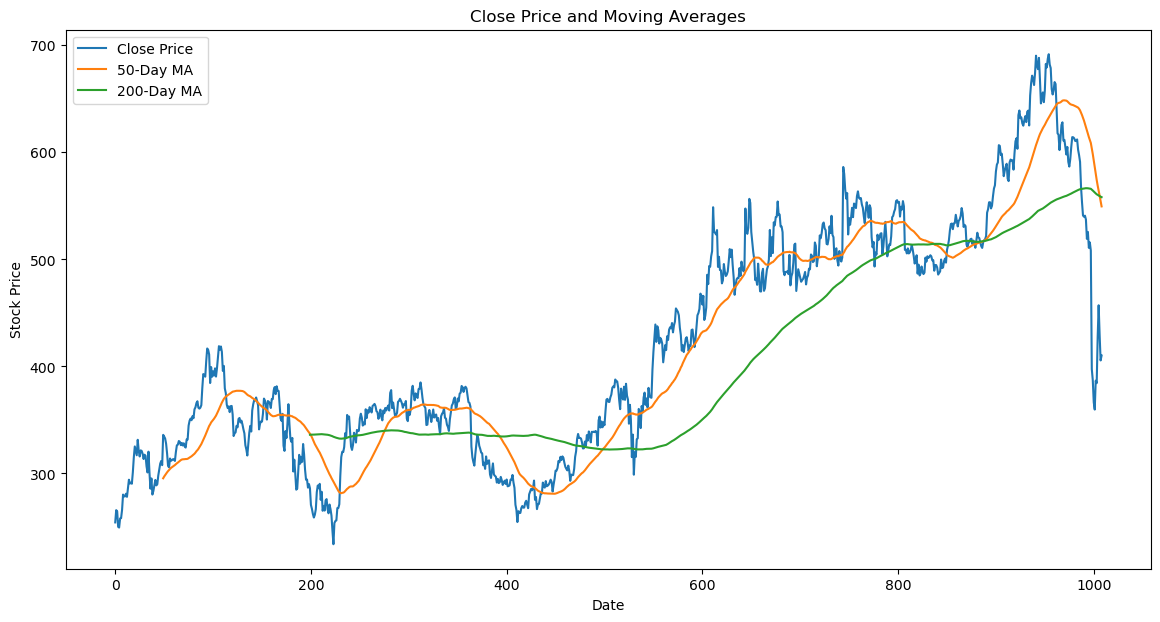

In [17]:
# Moving Average
Calculate moving averages to smooth out the series and identify trends over different time spans.
lsdata['MA50'] = lsdata['Close'].rolling(window=50).mean()
lsdata['MA200'] = lsdata['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(lsdata['Close'], label='Close Price')
plt.plot(lsdata['MA50'], label='50-Day MA')
plt.plot(lsdata['MA200'], label='200-Day MA')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## 2. Volatility Analysis# 
Examine how much the stock price fluctuates within a given period.

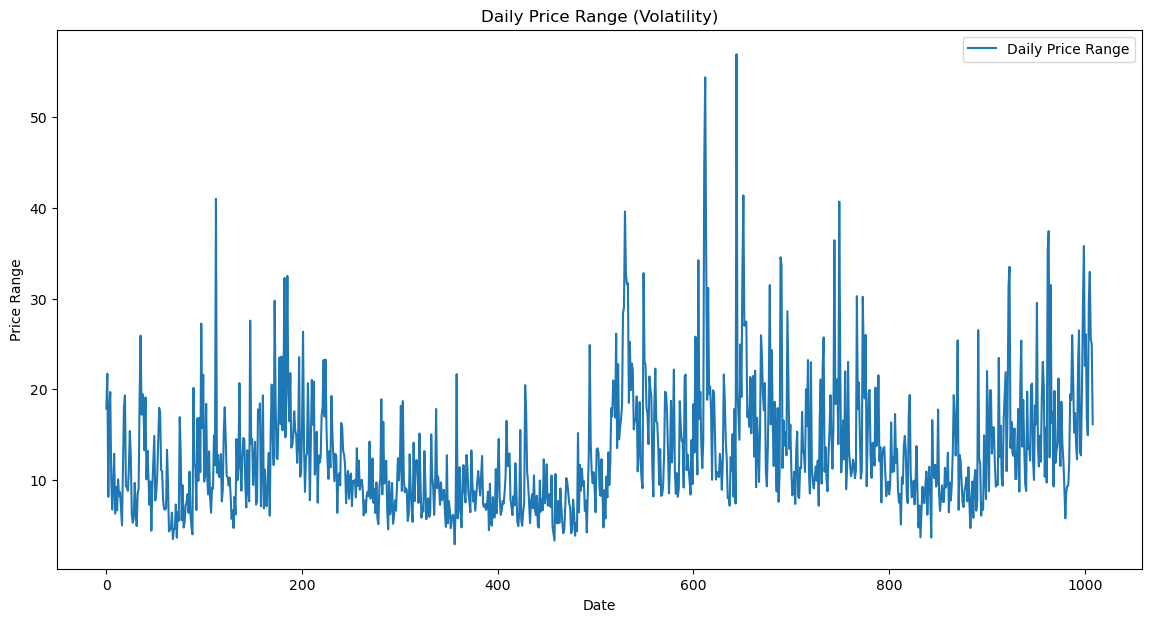

In [18]:
# Daily Price Range
# Calculate the daily price range and plot it to assess volatility.

lsdata['Daily Range'] = lsdata['High'] - lsdata['Low']

plt.figure(figsize=(14, 7))
plt.plot(lsdata['Daily Range'], label='Daily Price Range')
plt.title('Daily Price Range (Volatility)')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()


## 3. Volume Analysis
# Trading volume can provide insights into the strength of a price move.

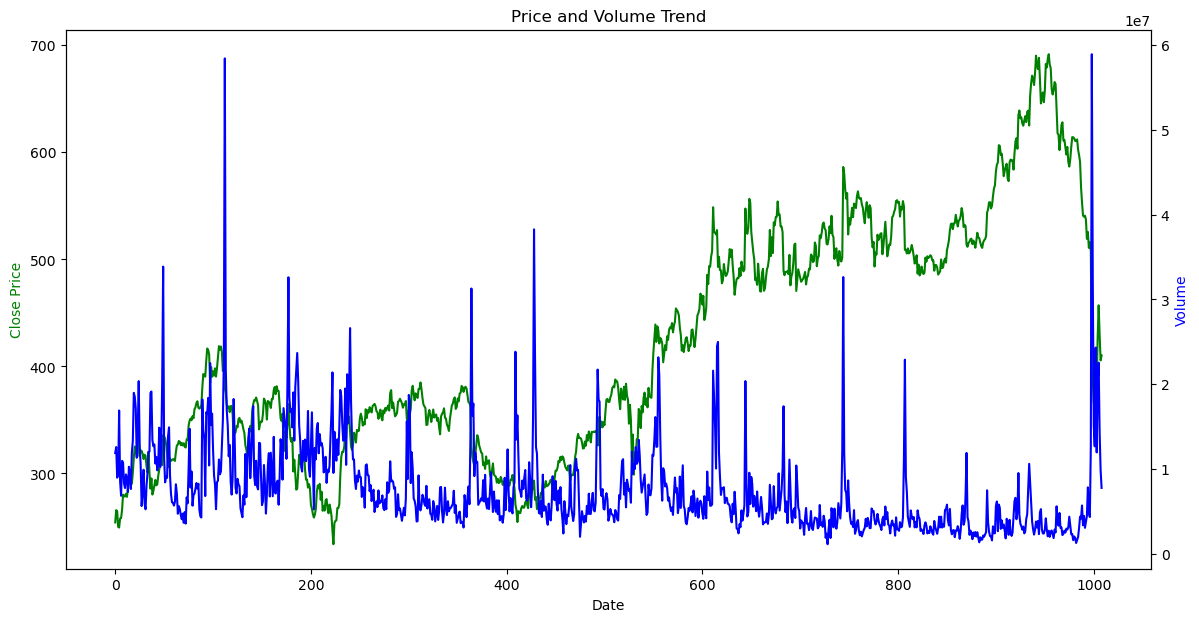

In [19]:
# Trading Volume Trends
# Plot the trading volume and correlate it with price movements.

fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
ax1.plot(lsdata['Close'], 'g-')
ax2.plot(lsdata['Volume'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='g')
ax2.set_ylabel('Volume', color='b')

plt.title('Price and Volume Trend')
plt.show()


## 4. Seasonality Analysis
# Check for any seasonal patterns in stock prices.

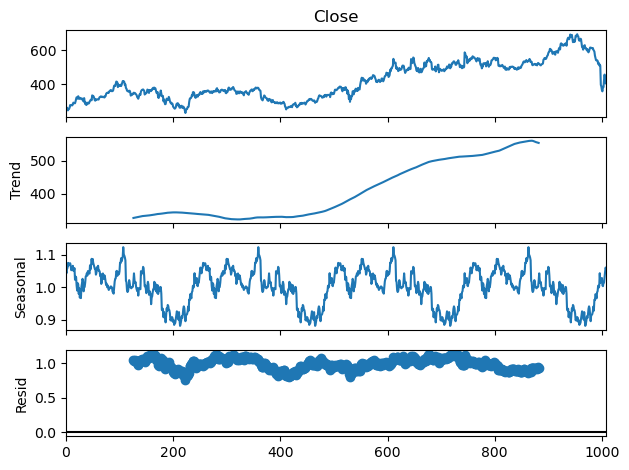

In [22]:
# Seasonal Decomposition
# Use seasonal decomposition to understand underlying patterns.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(lsdata['Close'], model='multiplicative', period=252)  # Assuming '252 trading days in a year'
result.plot()
plt.show()


## 5. Correlation Between Features
# Investigate how different variables are interrelated.

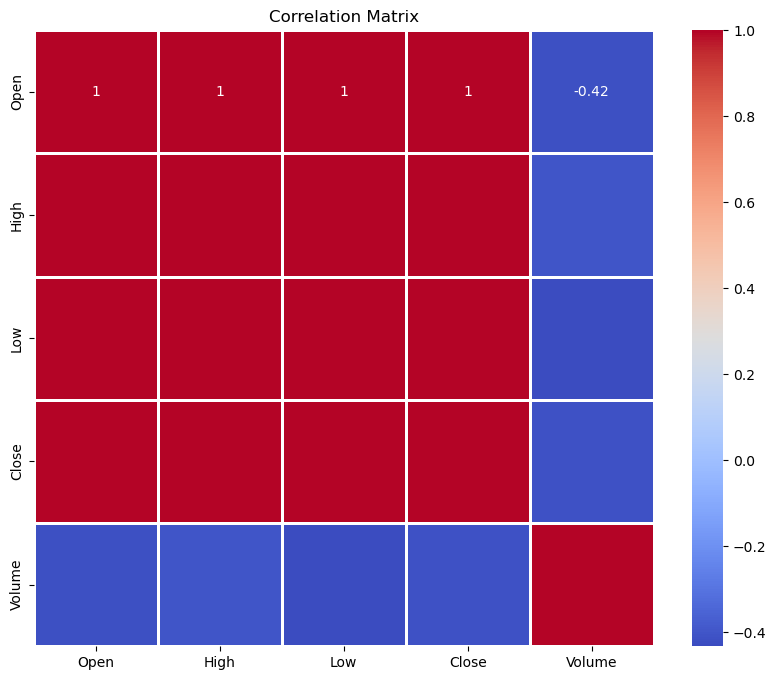

In [23]:
import seaborn as sns

correlation = lsdata[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Matrix')
plt.show()


## Success